# Problem Statement

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection  import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/Hrushikesh/Desktop/Company Material/Advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 5)

In [5]:
data.drop("Unnamed: 0",axis=1, inplace=True)

In [6]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
data.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

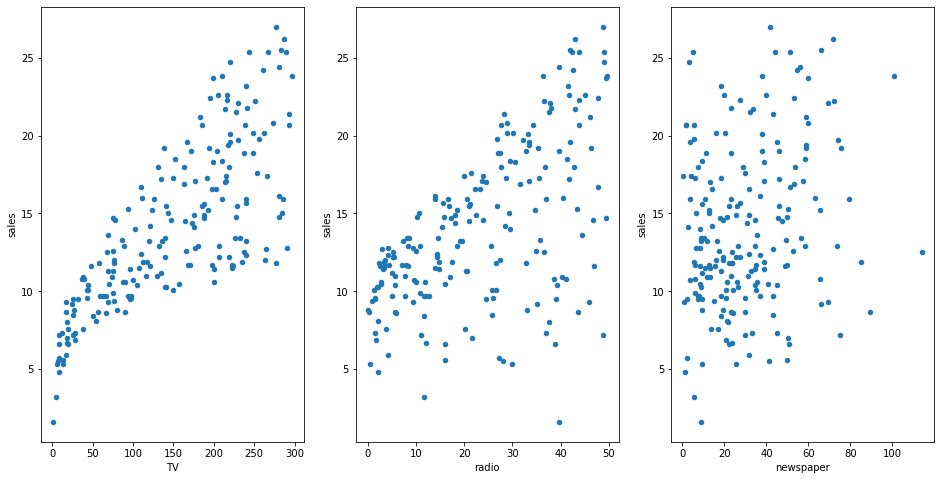

In [9]:
fig, axs = plt.subplots(1,3)
data.plot(kind= 'scatter', x='TV', y='sales', ax=axs[0], figsize=(16,8))
data.plot(kind= 'scatter', x='radio', y='sales', ax=axs[1]),
data.plot(kind= 'scatter', x='newspaper', y='sales', ax=axs[2])

#### From the above graph we can see that their is a linear relation between TV and tadio with sales

<AxesSubplot:xlabel='TV', ylabel='Count'>

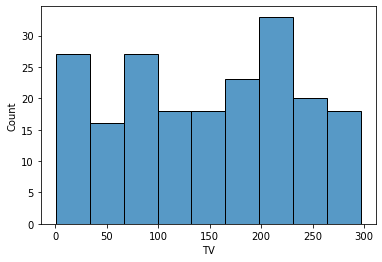

In [10]:
sns.histplot(data['TV'])

#### The distribution of TV column is uniform

<AxesSubplot:xlabel='radio', ylabel='Count'>

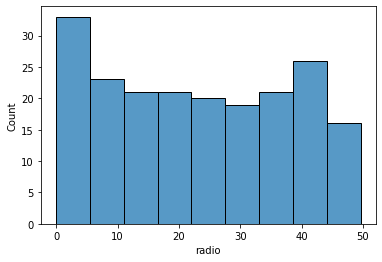

In [11]:
sns.histplot(data['radio'])

#### The distribution of radio column is uniform

<AxesSubplot:xlabel='newspaper', ylabel='Count'>

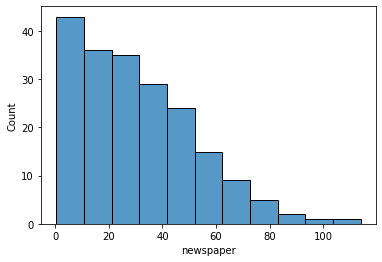

In [12]:
sns.histplot(data['newspaper'])

#### The distribution of newspaper column in nonuniform

## Correlation

In [13]:
corr = data.corr()
corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


#### This shows the corelation between dependent and independant variable we will visualize correlation using  heatmap

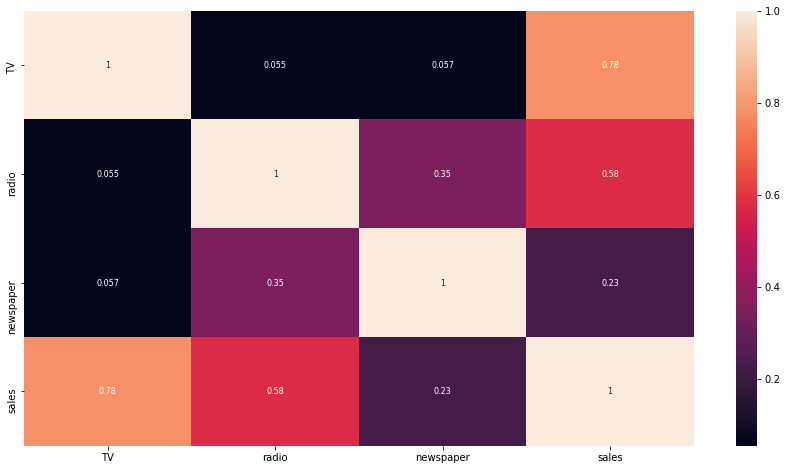

In [14]:
df_corr = data.corr().abs()
plt.figure(figsize=(15,8))
sns.heatmap(df_corr, annot=True, annot_kws={'size':8})
plt.show()


#### As we see from above heatmap their is only positive correlation. Column sales is highly corelated with TV, Sales are moderately corelated with radio and sales is less correlated with newspaper. We also observe that their is no high correlation between features to features means their is no multicolinearity problem

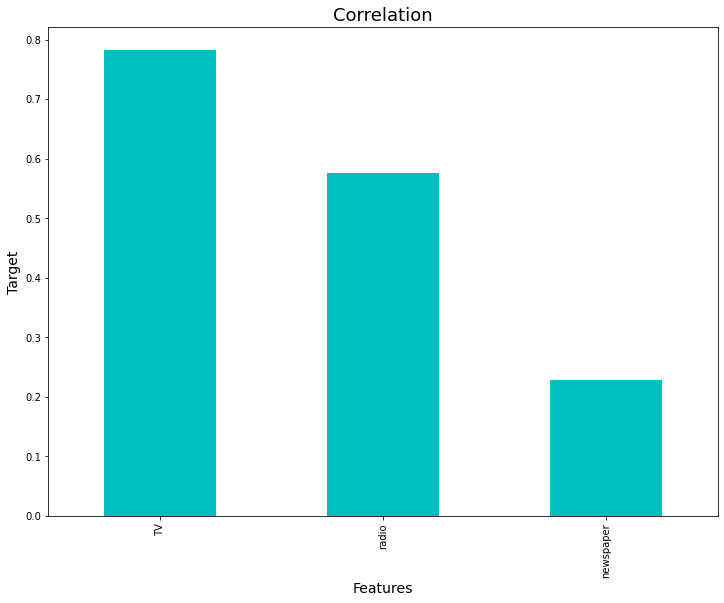

In [16]:
plt.figure(figsize=(12,9))
data.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind = 'bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation', fontsize=18)
plt.show()

#### Here we can easily observe correlation as sales are highly correlated with TV, moderately with radio and less with newspaper

# Outliers

<AxesSubplot:>

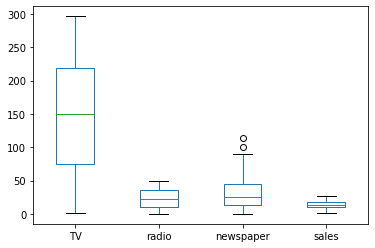

In [17]:
data.plot(kind='box')

#### Their is outliers present in newspaper columns

# Removing Outliers

In [18]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [19]:
v = data[["newspaper"]]

In [20]:
from scipy.stats import zscore

In [21]:
z= np.abs(zscore(v))
new_data = data[(z<3).all(axis=1)]
new_data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [22]:
new_data.shape

(198, 4)

In [23]:
data.shape

(200, 4)

In [24]:
data_loss = (200-198)/200*100
data_loss

1.0

<AxesSubplot:>

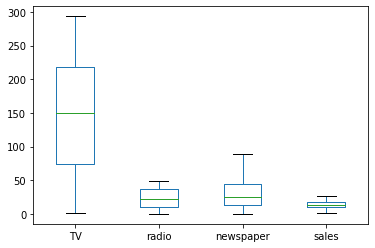

In [25]:
new_data.plot(kind='box')

#### Now the Outliers are not present in newspaper

# Skewness

In [26]:
new_data.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

#### Skewness threshold is taken as +/- 0.65
#### Only newspaper contain skewness

# Removing skewness

In [27]:
s = ["newspaper"]

In [28]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
'''

parameters:

method = 'box-cox' or 'yeo-johnson'
'''

"\n\nparameters:\n\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [29]:
new_data[s] = scaler.fit_transform(new_data[s].values)
new_data[s]

,newspaper
0,1.604196
1,0.831044
2,1.607052
3,1.283768
4,1.280622
...,...
195,-0.687435
196,-1.146090
197,-1.314437
198,1.517395


In [30]:
new_data.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.101288
sales        0.407130
dtype: float64

#### The Skewness has been removed from the newspaper


<AxesSubplot:xlabel='newspaper', ylabel='Density'>

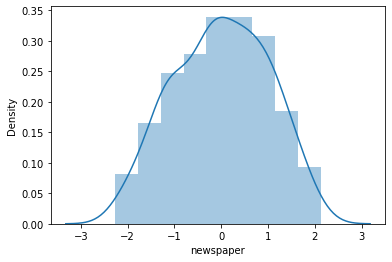

In [31]:
sns.distplot(new_data['newspaper'])

#### Feature newspaper looks normally distributed and has no skewness

# Data Preprocessing

In [32]:
x = new_data.drop("sales", axis = 1)
y = new_data["sales"]

In [33]:
x

,TV,radio,newspaper
0,230.1,37.8,1.604196
1,44.5,39.3,0.831044
2,17.2,45.9,1.607052
3,151.5,41.3,1.283768
4,180.8,10.8,1.280622
...,...,...,...
195,38.2,3.7,-0.687435
196,94.2,4.9,-1.146090
197,177.0,9.3,-1.314437
198,283.6,42.0,1.517395


In [34]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,TV,radio,newspaper
0,0.978697,0.989521,1.604196
1,-1.199012,1.090705,0.831044
2,-1.519332,1.535913,1.607052
3,0.056456,1.225616,1.283768
4,0.400243,-0.831784,1.280622
...,...,...,...
193,-1.272932,-1.310720,-0.687435
194,-0.615864,-1.229773,-1.146090
195,0.355657,-0.932968,-1.314437
196,1.606431,1.272836,1.517395


# Modelling

In [41]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    lm = LinearRegression()
    lm.fit(x_train,y_train)
    pred = lm.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc >maxAccu:
        maxAccu = acc
        maxRs = i
print("Maximum r2 score is ",maxAccu,"on Random_state ",maxRS)

Maximum r2 score is  0.9358346827439895 on Random_state  0


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state = maxRS)

# LineaRegression

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [44]:
from sklearn import metrics
lm = LinearRegression()
lm.fit(x_train,y_train)
predlm=lm.predict(x_test)
print('R2_score:',metrics.r2_score(y_test,predlm))

R2_score: 0.9087464917402328


In [47]:
print(metrics.mean_absolute_error(y_test, predlm))

1.257503049788213


In [49]:
print(metrics.mean_squared_error(y_test, predlm))

2.6829897696175764


In [50]:
print(np.sqrt(metrics.mean_squared_error(y_test, predlm)))

1.637983446075563


# Random Forest Regressor

In [51]:
RF = RandomForestRegressor()
RF.fit(x_train, y_train)
predRF = RF.predict(x_test)
print('R2_score:',metrics.r2_score(y_test,predRF))

R2_score: 0.9782689689177773


#### The R2 Score using Random Forest Regressor is 93%

In [52]:
print(metrics.mean_absolute_error(y_test, predRF))

0.6177166666666651


In [53]:
print(metrics.mean_squared_error(y_test, predRF))

0.6389248499999982


In [54]:
print(np.sqrt(metrics.mean_squared_error(y_test, predRF)))

0.7993277487989505


# DecisionTree Regressor

In [55]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print('R2_score:',metrics.r2_score(y_test,preddt))

R2_score: 0.9649167526332512


In [56]:
print(metrics.mean_absolute_error(y_test, preddt))

0.8350000000000002


In [59]:
print(metrics.mean_squared_error(y_test, preddt))

1.0315


In [60]:
print(np.sqrt(metrics.mean_squared_error(y_test, preddt)))

1.0156278846112883


# Knn Regressor

In [62]:
knn = KNN()
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)
print('R2_score:',metrics.r2_score(y_test,predknn))

R2_score: 0.9439849387866586


In [64]:
print(metrics.mean_absolute_error(y_test, predknn))
print(metrics.mean_squared_error(y_test, predknn))
print(np.sqrt(metrics.mean_squared_error(y_test, predknn)))

0.9176666666666665
1.646926666666666
1.283326406907715


# SVR Regressor

In [65]:
svr = SVR()
svr.fit(x_train, y_train)
predsvr = svr.predict(x_test)
print('R2_score:',metrics.r2_score(y_test,predsvr))

R2_score: 0.8817688239535069


In [66]:
print(metrics.mean_absolute_error(y_test, predsvr))
print(metrics.mean_squared_error(y_test, predsvr))
print(np.sqrt(metrics.mean_squared_error(y_test, predsvr)))

1.1244694707905871
3.4761735941110334
1.8644499441151627


# Cross Validation Score

In [68]:
# Cross validation for Linear Regression
print(cross_val_score(lm,x,y,cv=5).mean())

0.8857739370001966


In [69]:
# Cross validation for RandomForestRegressor
print(cross_val_score(RF,x,y,cv=5).mean())

0.9762354786067402


In [70]:
# Cross validation for DecisionTreeRegressor
print(cross_val_score(dt,x,y,cv=5).mean())

0.9544667000305079


In [71]:
# Cross validation for KNNRegressor
print(cross_val_score(knn,x,y,cv=5).mean())

0.9342426712595204


In [72]:
# Cross validation for SVRRegressor
print(cross_val_score(svr,x,y,cv=5).mean())

0.9036275725678571


#### From the above observation, we conclude that RandomForestRegressor is our Best fit model

# Hyper Parameter Tuning

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,4,6]}

In [76]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)


In [77]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [78]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [80]:
Add_sales = RandomForestRegressor(criterion='mse', max_depth=6, max_features='auto', n_estimators=200)
Add_sales.fit(x_train, y_train)
pred = Add_sales.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, predRF)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.7993277487989505
R2_Score: 97.65680092455847


# Saving The Model

In [81]:
import joblib

joblib.dump(Add_sales,'Add_Sales_Channel.obj')


['Add_Sales_Channel.obj']

In [82]:
loadmodel = joblib.load('Add_Sales_Channel.obj')

# Conclusion

In [83]:
a = np.array(y_test)
predicted = np.array(loadmodel.predict(x_test))
df_com = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_com

,Original,Predicted
0,14.6,15.517756
1,8.4,9.385708
2,18.0,16.320312
3,11.7,12.442188
4,8.8,8.268375
5,16.0,15.538545
6,7.2,7.147375
7,15.5,15.156542
8,9.2,8.364073
9,16.6,17.104195
